# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [63]:
# Import the libraries you'll need here.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
%matplotlib inline

import scipy.stats as stats

from IPython.display import Image



# Load the csv file into a pandas dataframe.


In [29]:
# Load the csv file into a pandas dataframe.
cars = pd.read_csv('data/cars.csv')

cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [30]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(cars.duplicated().sum())

720


In [31]:
#  2. Modify our df to have all duplicate rows removed. 
cars = cars.drop_duplicates()
print(cars.shape)

(11194, 15)


In [32]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(cars.duplicated().sum())


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [33]:
# * Which column has the most null values and how many null values does it have?
cars.isnull().sum()



Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [34]:
# * Print how long (aka how many rows) our dataframe is.
print(cars.shape)

(11194, 15)


In [35]:
# * Remove any row that has a null value in it. 
cars = cars.dropna()


In [36]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(cars.shape)

cars.isnull().sum()



(11092, 15)


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

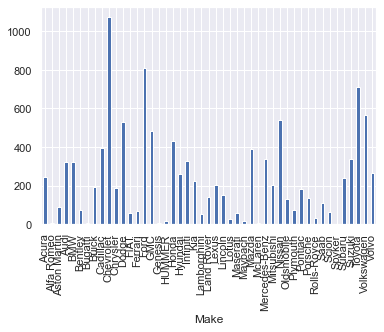

In [37]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
gb = cars.groupby('Make')['Make'].count()

gb.plot(kind='bar');



# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

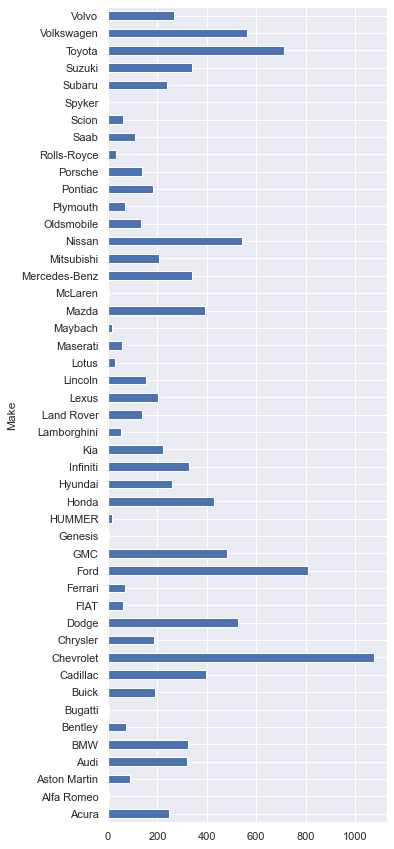

In [38]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.
gb.plot(kind='barh', figsize=(5,15));


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


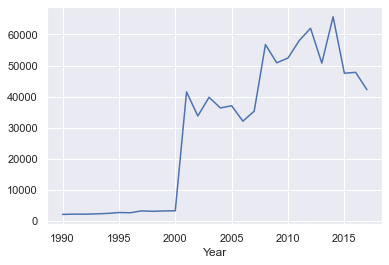

In [39]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
gb_year = cars.groupby('Year')['MSRP'].mean()

gb_year.plot(kind='line');


# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

In [40]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
year_condition = cars['Year'] <= 2000
orig_msrp = cars['MSRP']
cars['adjusted_price'] = np.where(year_condition, 10*orig_msrp, orig_msrp)

cars[year_condition]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000,20000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,Compact,Coupe,23,16,640,2000,20000
11832,GMC,Yukon Denali,2000,regular unleaded,255.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,15,11,549,3949,39490
11881,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,24,17,3916,4976,49760
11882,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr Hatchback,24,17,3916,4697,46970


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

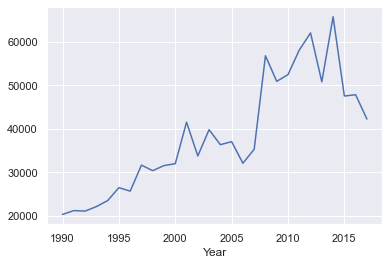

In [41]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000
gb_year_adjusted = cars.groupby('Year')['adjusted_price'].mean()

gb_year_adjusted.plot(kind='line');



# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [42]:
# What are the top 5 car makers make the most expensive cars on average.
make_gb = cars.groupby('Make')
make_df = pd.DataFrame(make_gb['adjusted_price'].mean())

make_df.nlargest(5, 'adjusted_price', keep='first')

,adjusted_price
Make,
Bugatti,1.757224e+06
Maybach,5.462219e+05
Rolls-Royce,3.511306e+05
Lamborghini,3.315673e+05
Bentley,2.471693e+05


# What are the top 5 car makers that have the highest median highway MPG?

In [43]:
# Which car makers have the highest median highway MPG?
mpg_df = pd.DataFrame(make_gb['highway MPG'].median())

mpg_df.nlargest(5, 'highway MPG', keep='first')

,highway MPG
Make,
Alfa Romeo,34
FIAT,33
Honda,32
Scion,32
Volkswagen,32


# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

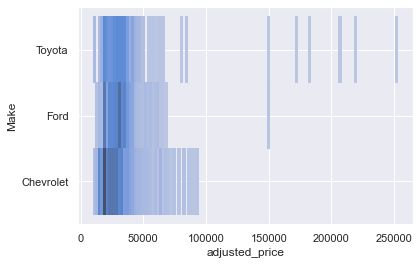

In [44]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
make_condition = cars.Make.isin(['Chevrolet','Ford','Toyota'])
cars_makefiltered = cars[make_condition]
sns.histplot(data=cars_makefiltered, x='adjusted_price', y='Make');


# Remake the same histogram, but limit the x-axis from 0 to 100,000

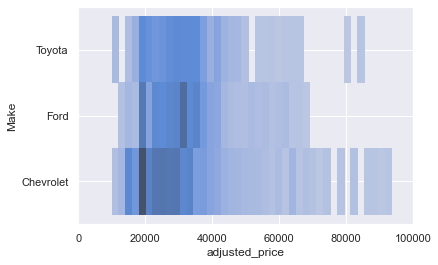

In [45]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
histogram = sns.histplot(data=cars_makefiltered, x='adjusted_price', y='Make');
histogram.set_xlim(0, 100000);


# Plot the relationship between Engine HP and highway MPG

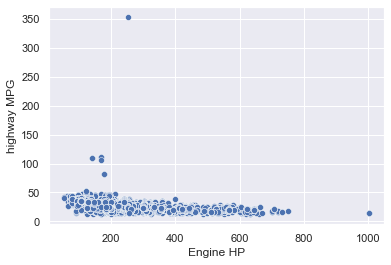

In [46]:
# Plot the relationship between Engine HP and highway MPG
sns.scatterplot(data=cars, x='Engine HP', y='highway MPG');



# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

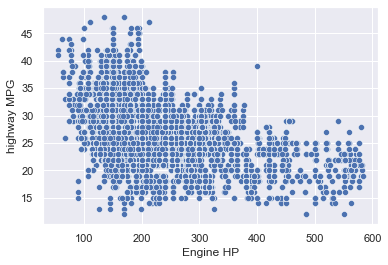

In [60]:
# Remove any statisical outliers from Engine HP and highway MPG

#cars = cars.dropna() 

numerical_cols = ['Engine HP', 'highway MPG']

z_score_cols = []

for col in numerical_cols:
    
    new_col_name = col + '_zscore'
    
    cars[new_col_name] = stats.stats.zscore(cars[col])
    
    cars[new_col_name] = abs(cars[new_col_name])
    
    z_score_cols.append(new_col_name)
    
new_cars = cars.copy()

hp_condition = new_cars['Engine HP_zscore'] < 3

mpg_condition = new_cars['highway MPG_zscore'] < 3

new_cars = new_cars[hp_condition & mpg_condition]

sns.scatterplot(data=new_cars, x='Engine HP', y='highway MPG');

# What does this plot tell you about how Engine HP affects highway MPG?

In [61]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('There is a negative correlation between Engine HP and highway MPG')

There is a negative correlation between Engine HP and highway MPG


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

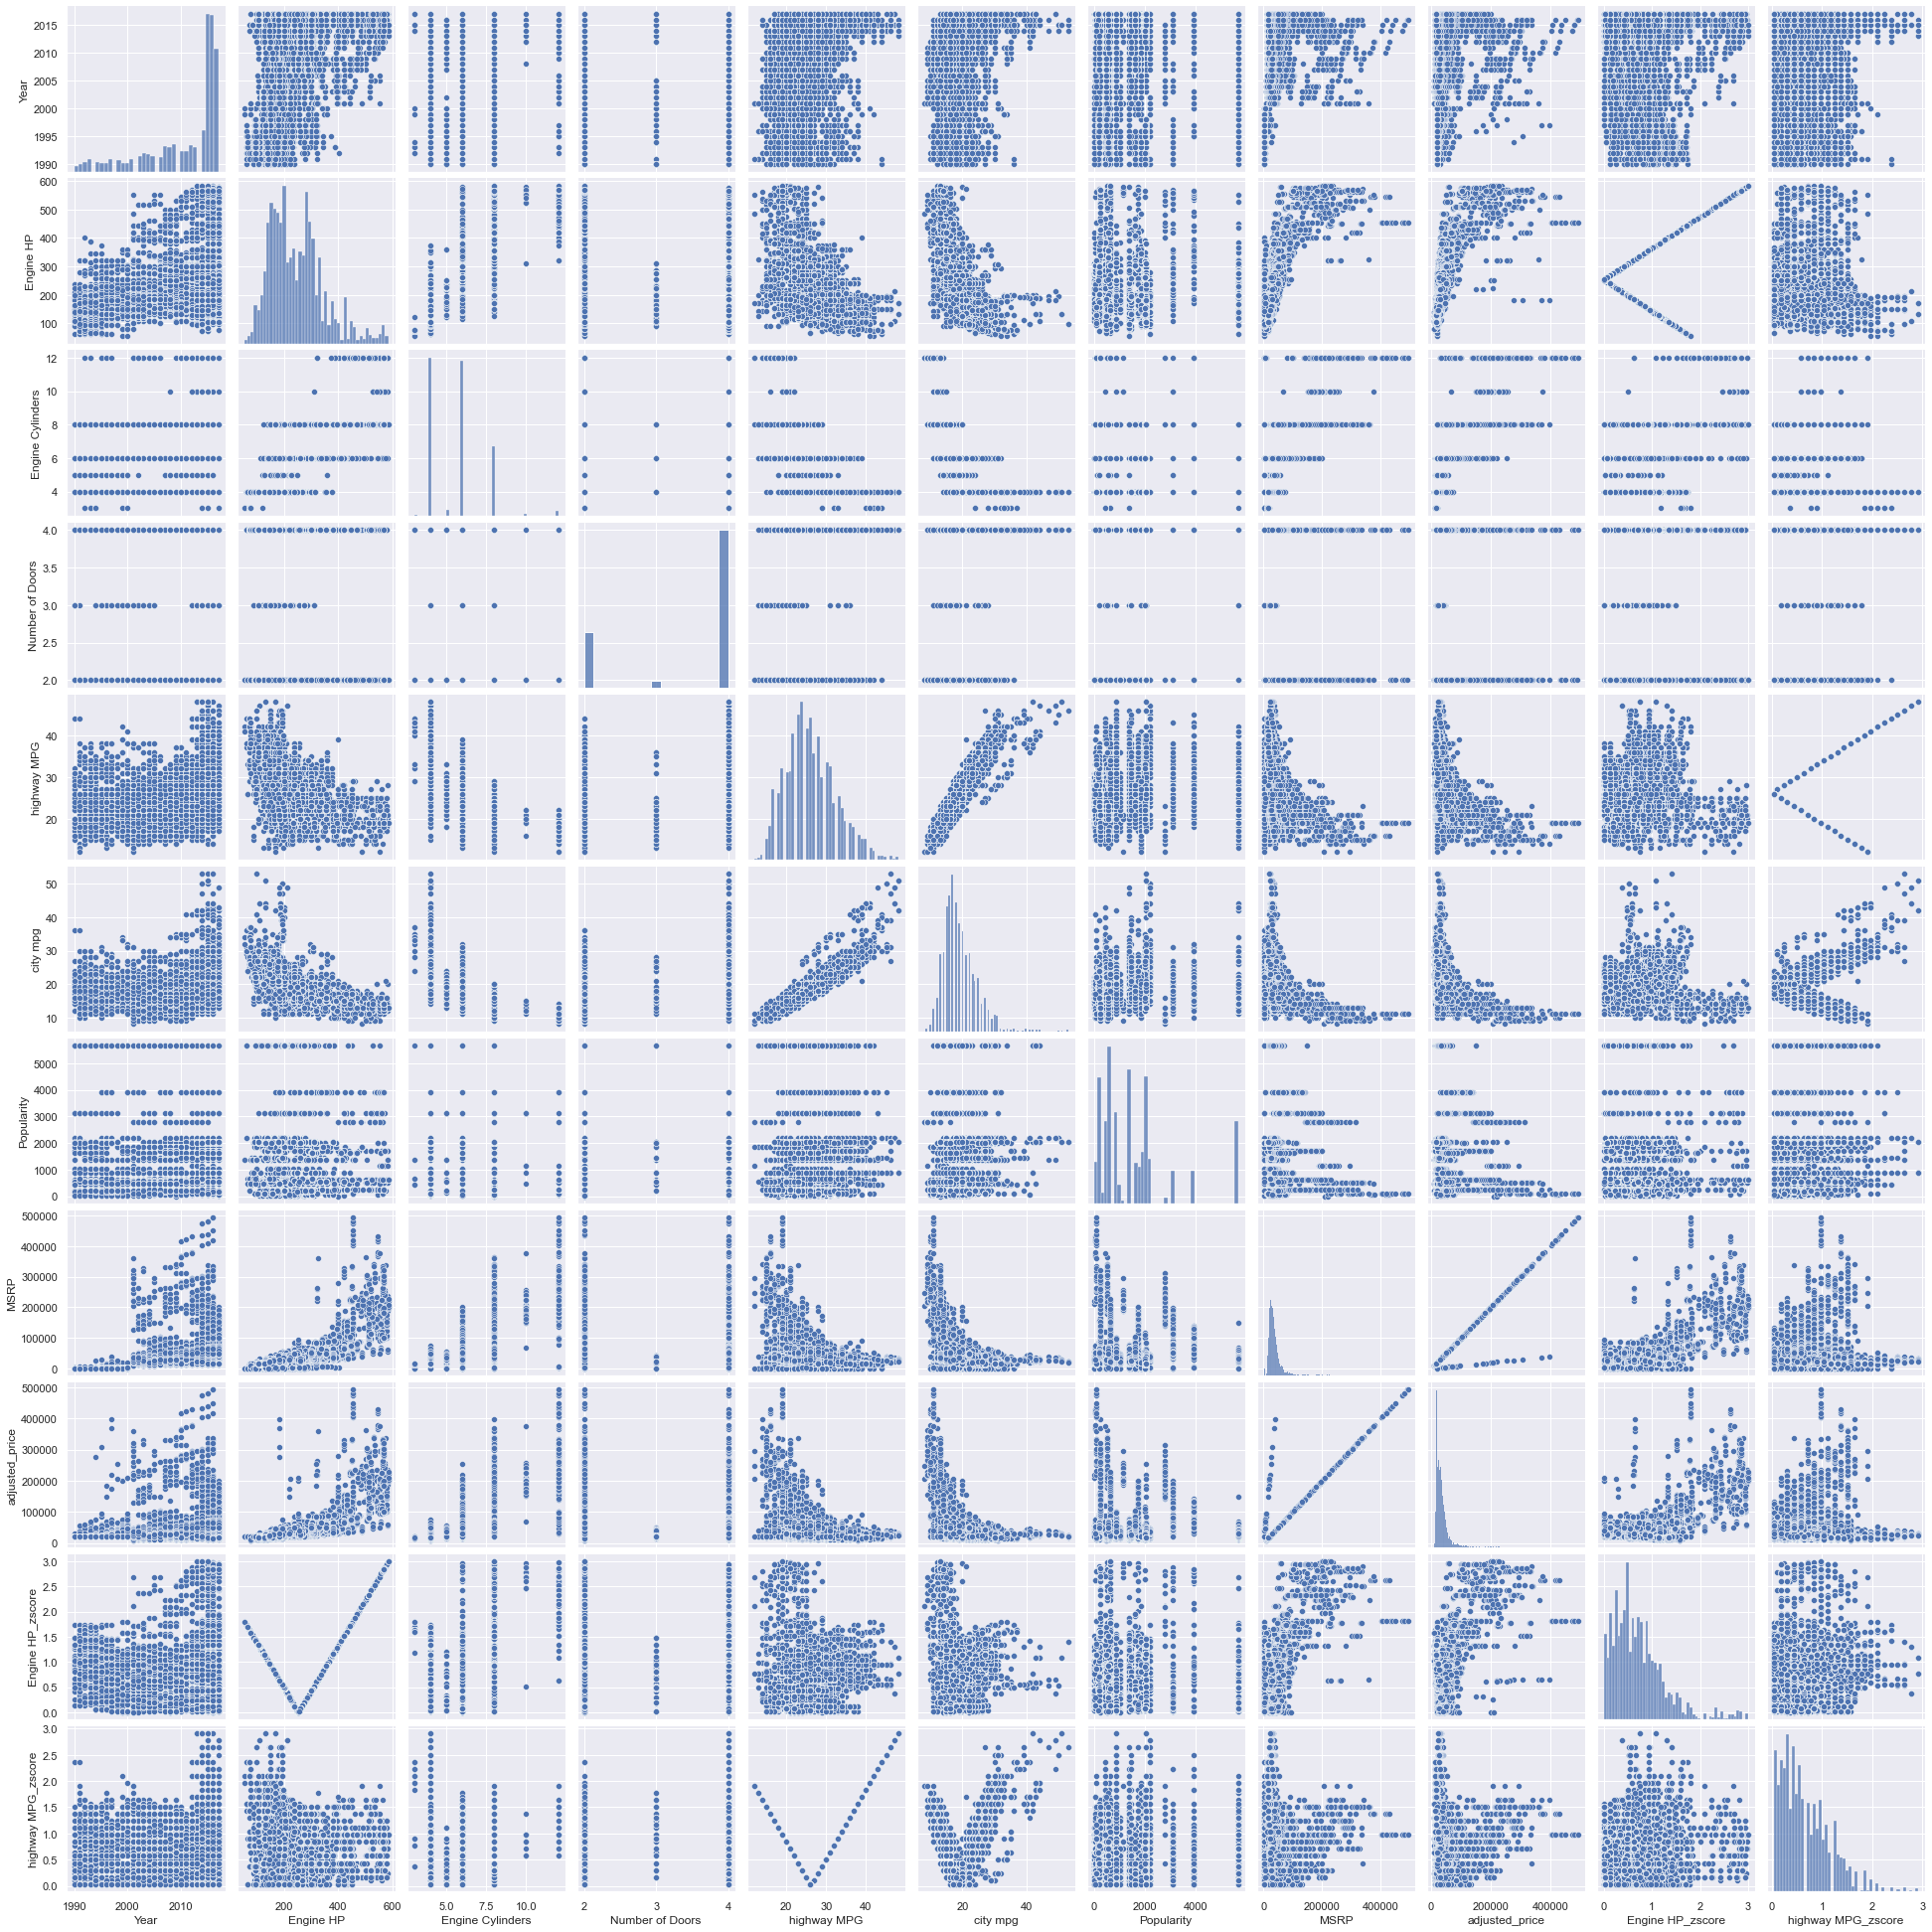

In [65]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(new_cars);


In [28]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('highway mpg and city mpg')



YOUR ANSWER HERE


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

Engine HP has the strongest correlation with engine cylinders, which makes sense because they are both variables concerning the car's engine


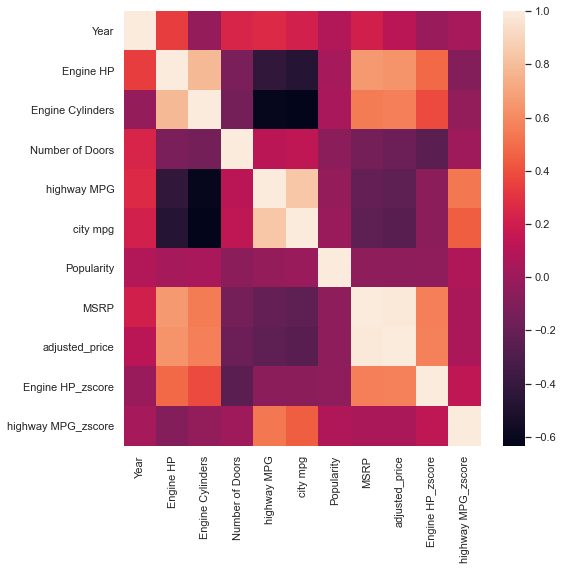

In [76]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize = (8,8))
sns.heatmap(cars.corr());
print('Engine HP has the strongest correlation with engine cylinders, which makes sense because they are both variables concerning the car\'s engine')

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well


